<a href="https://colab.research.google.com/github/manuelfdng/ml_from_scratch/blob/main/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPERVISED LEARNING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regresion

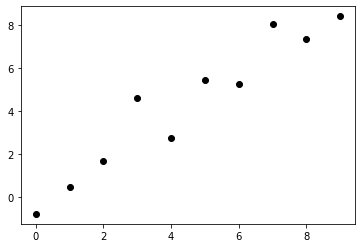

In [ ]:
#Generate synthetic data
#features
x1 = np.ones((10))
x2 = np.arange(0, 10, 1)
#labels
y = x2 + np.random.randn(10)

plt.figure()
plt.plot(x2, y, 'ok')

## LMS Algorithm

epoch: 0 cost: 139.7336716650488
epoch: 1 cost: 71.99174416824516
epoch: 2 cost: 38.05140515146171
epoch: 3 cost: 21.046149112348033
epoch: 4 cost: 12.525615562679732
epoch: 5 cost: 8.256053026974863
epoch: 6 cost: 6.116291447608878
epoch: 7 cost: 5.0435942697638385
epoch: 8 cost: 4.505515260460618
epoch: 9 cost: 4.235291221838888
theta: [[0.13569651]
 [0.92371577]]


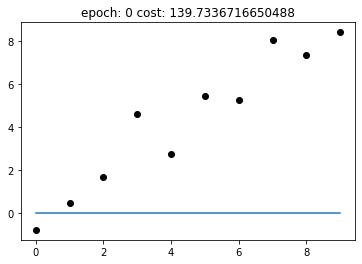

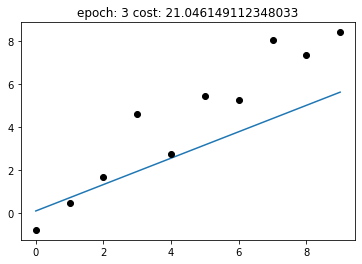

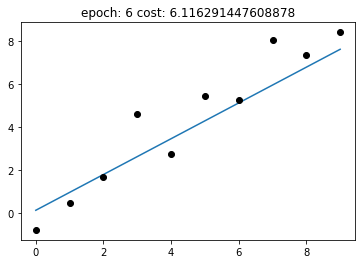

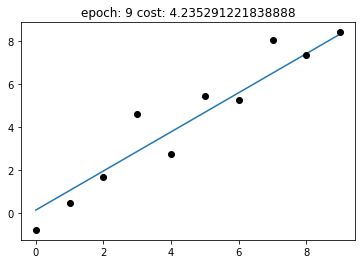

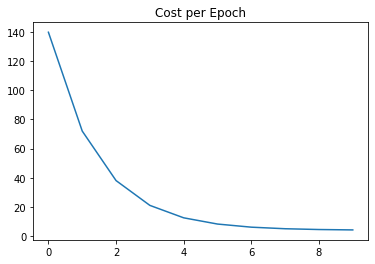

In [ ]:
x = np.c_[x1, x2].T

#params
theta = np.zeros((2, 1))

#hyperparams 
epochs = 10
lr = -1e-3

costs = []

for epoch in range(epochs):
    #forward pass
    preds = np.dot(theta.T, x)
    
    cost = 0.5*np.sum((preds-y)**2)
    costs.append(cost)
    print(f"epoch: {epoch} cost: {cost}")
    
    #backward pass
    #gradient update for y-intercept
    theta[0] = theta[0] + lr*np.sum((preds-y)*x[0])
    
    #gradient update for slope
    theta[1] = theta[1] + lr*np.sum((preds-y)*x[1])
    
    if epoch % 3 == 0:
        plt.figure()
        plt.title(f"epoch: {epoch} cost: {cost}")
        plt.plot(preds[0])
        plt.plot(x[1], y, 'ok')
        
plt.figure()
plt.title("Cost per Epoch")
plt.plot(costs)

print(f"theta: {theta}")

## Normal Equations (Solving Analytically)

cost before optimization: [[139.73367167]]
cost after optimization: [[3.73824958]]
theta: [[-0.25438012]
 [ 1.01673919]]


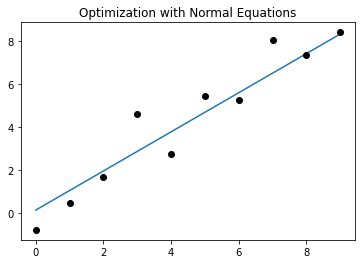

In [ ]:
x = np.c_[x1, x2]
theta = np.zeros((2, 1))

def getCost(theta):
    preds = np.dot(x, theta)
    mse = preds-y.reshape(10, 1)
    cost = 0.5*np.dot(mse.T, mse)
    return cost

print(f"cost before optimization: {getCost(theta)}")

theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y.reshape(10, 1))

print(f"cost after optimization: {getCost(theta)}")

plt.figure()
plt.title("Optimization with Normal Equations")
plt.plot(preds[0])
plt.plot(x[:,1], y, 'ok')

print(f"theta: {theta}")

## Newton's Method

iteration: 0 cost: 139.7336716650488
iteration: 1 cost: 3.7382495837528955
iteration: 2 cost: 3.738249583752894
theta: [[-0.25438012]
 [ 1.01673919]]


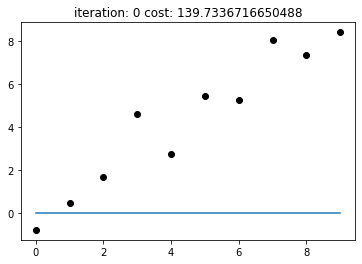

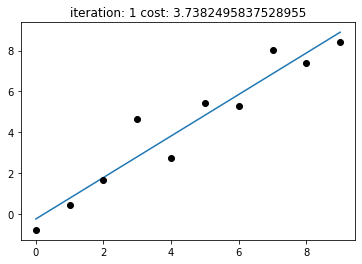

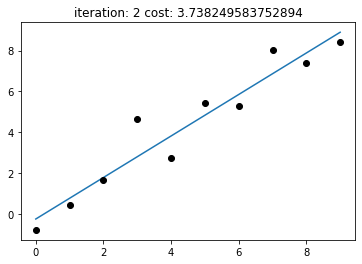

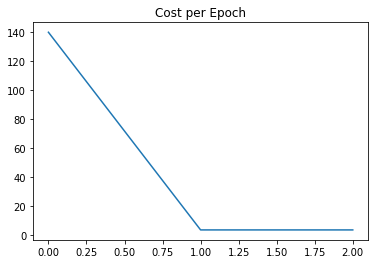

In [ ]:
x = np.c_[x1, x2]

theta = np.zeros((2, 1))

costs = []

iterations = 3

for i in range(iterations):
    #forward pass
    preds = np.dot(x, theta)
    
    cost = 0.5*np.sum((preds-y.reshape(10, 1))**2)
    costs.append(cost)
    print(f"iteration: {i} cost: {cost}")
    
    firstGrad = np.dot(np.dot(x.T, x), theta) - np.dot(x.T, y.reshape(10, 1))
    secondGrad = np.dot(x.T, x)
    theta = theta - np.dot(np.linalg.inv(secondGrad), firstGrad)
       
    if i % 1 == 0:
        plt.figure()
        plt.title(f"iteration: {i} cost: {cost}")
        plt.plot(preds)
        plt.plot(x[:, 1], y, 'ok')
        
plt.figure()
plt.title("Cost per Epoch")
plt.plot(costs)

print(f"theta: {theta}")

## Locally Weighted Linear Regression

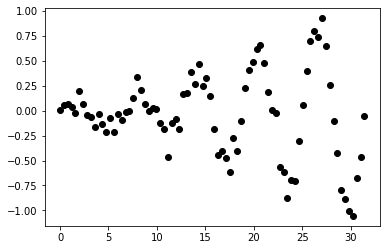

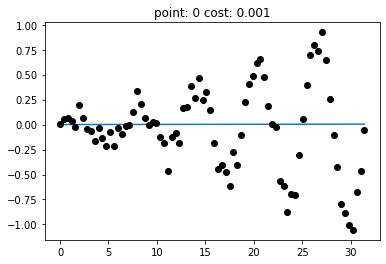

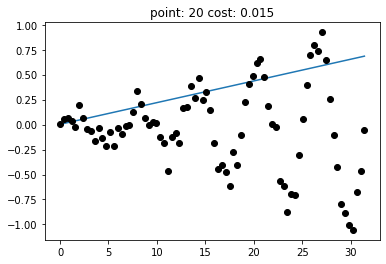

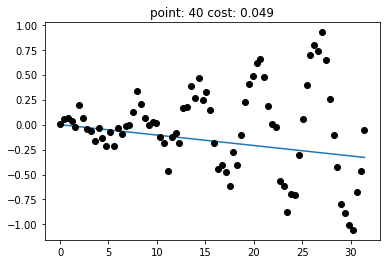

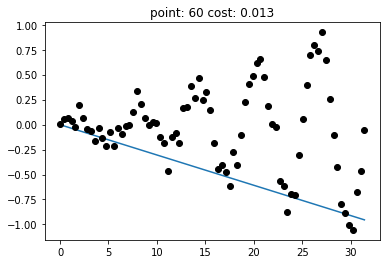

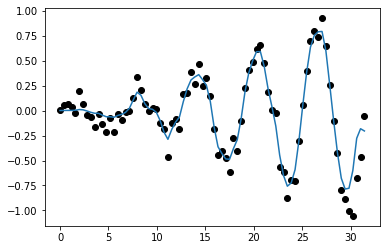

In [ ]:
n = 80
tau = 0.33

x1 = np.linspace(0, 10*np.pi, n)
y = np.sin(x1) * np.linspace(0, 1, n) + 0.1*np.random.randn(n)
plt.plot(x1, y, 'ok')

w = []

for i in range(n):
    a = np.exp(-((x1[i]-x1)**2)/(2*tau**2))
    w.append(a)
    
epochs = 10
lr = -1e-3
thetas = []

x2 = np.ones(n)
x = np.c_[x1, x2].T

for i in range(n):
    theta = np.zeros((2, 1))
    
    for epoch in range(epochs):
        #forward pass
        preds = np.dot(theta.T, x)
        
        cost = 0.5*np.sum(w[i]*(preds-y)**2)
        #print(f"point: {i} epoch: {epoch} cost: {cost:.3f}")
        
        #backward pass
        #gradient update for y-intercept
        theta[0] = theta[0] + lr*np.sum(w[i]*(preds-y)*x[0])
        
        #gradient update for slope
        theta[1] = theta[1] + lr*np.sum(w[i]*(preds-y)*x[1])
     
    if i % 20 == 0:          
        plt.figure()
        plt.title(f"point: {i} cost: {cost:.3f}")
        plt.plot(x[0], preds[0])
        plt.plot(x[0], y, 'ok')   
         
    thetas.append(theta)


loess_preds = []

for i in range(n):
    pred = np.dot(thetas[i].T, x[:, i])
    loess_preds.append(pred)
    
plt.figure()
plt.plot(x[0], y, 'ok')
plt.plot(x[0], loess_preds)

# Logistic Regression

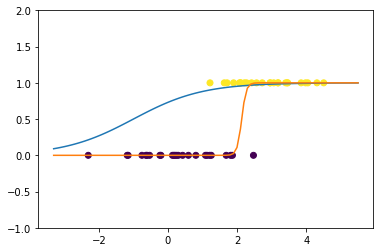

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Generate synthetic data
N = 25 # samples per class
K = 2 # num classes
sep = 3

x1 = np.ones((N*K))
x2 = np.zeros((N*K)) 
y = np.zeros((N*K), dtype="uint8")

for i in range(K):
    ix = range(i*N, (i+1)*N) 
    x2[ix] = np.random.randn(N) + i*sep
    y[ix] = i

x = np.c_[x1, x2].T

#params
theta = np.zeros((2, 1))

#hyperparams 
epochs = 100
lr = -1

costs = []

for epoch in range(epochs):
    #forward pass
    preds = np.dot(theta.T, x)
    preds = 1/(1+np.exp(-preds))

    #backward pass
    #gradient update for y-intercept
    theta[0] = theta[0] + lr*np.sum((preds-y)*x[0])
    
    #gradient update for slope
    theta[1] = theta[1] + lr*np.sum((preds-y)*x[1])

#plot initial and learned logistic function
x_gen = np.arange(x[1].min()-1, x[1].max()+1, 0.1)
x_gen = np.c_[np.ones((x_gen.shape)), x_gen].T

def plotLogistic(theta, label):
    y_gen = 1/(1+np.exp(-np.dot(theta.T, x_gen)))
    plt.plot(x_gen[1], y_gen[0,:], label=label)

plt.figure()
plt.scatter(x[1], y, c=y)
plt.ylim(-1, 2)
plotLogistic(np.ones((2, 1)), label="initial params")
plotLogistic(theta, label="learned params")



# Decision Trees

In [ ]:
import pandas as pd
import math

In [ ]:
df = pd.read_excel("DT_Exercise.xlsx")

In [ ]:
def ent(ser):
    """
    Returns entropy given a series with length of 2. If series has a length of one,
    this implies that the other value is 0, meaning that the entropy is 0.
    """
    a = ser.iloc[0]
    try:
        b = ser.iloc[1]      
    except:     
        ent = 0
        return ent
    
    ent = -a*math.log2(a) - b*math.log2(b)
    return ent

def etd(by, dtf):
    """
    Returns entropy of the relationship between a categorical variable and
    Sentiment
    """
    grpby = dtf.groupby([by])
    ls = list(grpby.groups.keys())
    ent_a = ent(grpby['Sentiment'].get_group(ls[0]).value_counts(normalize=True))
    ent_b = ent(grpby['Sentiment'].get_group(ls[1]).value_counts(normalize=True))
    freq_a = df[by].value_counts(normalize=True).loc[ls[0]]
    freq_b = df[by].value_counts(normalize=True).loc[ls[1]]
    etd = freq_a*ent_a + freq_b*ent_b
    
    return etd

In [ ]:
print(f"Gender: {etd('Gender', df)}")
print(f"Age: {etd('Age', df)}")
print(f"Department: {etd('Department', df)}")

#Age is root node
#AGE -> YOUNG > POSITIVE SENTIMENT; AGE -> OLD -> cont.

Gender: 0.9422298160545708
Age: 0.6941338203090655
Department: 0.9422298160545708


In [ ]:
filt = df['Age'] == 'old'
df = df.loc[filt]
df

,Gender,Age,Department,Sentiment
3,female,old,B,positive
4,male,old,A,negative
5,female,old,B,positive
6,male,old,A,negative
7,female,old,A,negative
8,male,old,B,negative
9,male,old,B,positive
10,female,old,B,negative


In [ ]:
print(f"Gender: {etd('Gender', df)}")
print(f"Department: {etd('Department', df)}")

#Department is next division
#AGE -> OLD -> DEPARTMENT -> A -> NEGATIVE SENTIMENT; AGE -> OLD -> DEPARTMENT -> B -> cont.

Gender: 0.9056390622295665
Department: 0.6068441215341679


In [ ]:
filt = df['Department'] == 'B'
df = df.loc[filt]
df

# no more opportunities to yield an entropy of 0, but can still be split by gender
#Positive is more likely than negative for Department B
#AGE -> OLD -> DEPARTMENT -> B -> Positive 

,Gender,Age,Department,Sentiment
3,female,old,B,positive
5,female,old,B,positive
8,male,old,B,negative
9,male,old,B,positive
10,female,old,B,negative


# Association Rule Learning (Unsupervised)

In [ ]:
from itertools import combinations

thresh = 0.45

In [ ]:
df = pd.read_excel("Homework.xlsx", index_col="T_ID")

In [ ]:
df

,Hotdog Sandwich,Chicken Rice,Cheeseburger,Fries,Spaghetti,Sundae
T_ID,,,,,,
1,1,0,0,0,1,1
2,1,1,0,1,1,0
3,1,0,0,1,0,1
4,1,1,0,0,1,0
5,1,0,1,1,1,1
6,0,1,0,1,0,0
7,1,0,1,1,1,0
8,1,0,1,1,1,0
9,0,1,1,1,0,0


In [ ]:
c1 = df.sum()/len(df)

In [ ]:
c1

Hotdog Sandwich    0.666667
Chicken Rice       0.500000
Cheeseburger       0.333333
Fries              0.750000
Spaghetti          0.750000
Sundae             0.333333
dtype: float64

In [ ]:
f1 = c1[c1 > thresh]

In [ ]:
f1

Hotdog Sandwich    0.666667
Chicken Rice       0.500000
Fries              0.750000
Spaghetti          0.750000
dtype: float64

In [ ]:
c2_cands = list(combinations(f1.index, 2))


In [ ]:
c2_pre = []
for cand in c2_cands:
    filt = df[list(cand)]
    appearances = len(filt[(filt[cand[0]]==1) & (filt[cand[1]]==1)])
    c2_pre.append(appearances/len(df))

In [ ]:
c2 = pd.DataFrame(list(zip(c2_cands, c2_pre)))
c2 = pd.Series(c2[1].values, index=c2[0])

In [ ]:
c2

0
(Hotdog Sandwich, Chicken Rice)    0.250000
(Hotdog Sandwich, Fries)           0.416667
(Hotdog Sandwich, Spaghetti)       0.583333
(Chicken Rice, Fries)              0.333333
(Chicken Rice, Spaghetti)          0.333333
(Fries, Spaghetti)                 0.500000
dtype: float64

In [ ]:
c2[c2> 0.45]

0
(Hotdog Sandwich, Spaghetti)    0.583333
(Fries, Spaghetti)              0.500000
dtype: float64

In [ ]:
filt = df[["Hotdog Sandwich", "Fries", "Spaghetti"]]
c3 = (len(filt[(filt["Hotdog Sandwich"]==1) & (filt["Spaghetti"]==1) & (filt["Fries"]==1)]))/len(df)
print(c3)

0.3333333333333333


In [ ]:
#{Hotdog Sandwich, Spaghetti -> Fries}
print(c3/c2[("Hotdog Sandwich", "Spaghetti")]) #conf
print((c3/c2[("Hotdog Sandwich", "Spaghetti")])/c1["Fries"]) #lift'

#{Hotdog Sandwich, Fries -> Spaghetti}
print(c3/c2[("Hotdog Sandwich", "Fries")]) #conf
print((c3/c2[("Hotdog Sandwich", "Fries")])/c1["Spaghetti"]) #lift

#{Fries, Spaghetti -> Hotdog Sandwich}
print(c3/c2[("Fries", "Spaghetti")]) #conf
print((c3/c2[("Fries", "Spaghetti")])/c1["Hotdog Sandwich"]) #lift



0.5714285714285714
0.7619047619047619
0.7999999999999999
1.0666666666666667
0.6666666666666666
1.0
